In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# from stellargraph import StellarGraph
import networkx as nx
# import class from py file
from recursiveLeastSquares import RecursiveLeastSquares

In [2]:
df = pd.read_csv('data/int_values.csv')

In [3]:
df

,Timestamp,CAN_ID,Data_1,Data_2,Data_3,Data_4,Data_5,Data_6,Data_7,Data_8
0,0.000000,18FEBF0B,128,6,125,125,121,119,123,121
1,0.000584,08FE6E0B,128,6,128,6,64,6,32,6
2,0.005908,0CF00400,113,131,136,0,21,0,240,255
3,0.016016,0CF00400,33,131,137,0,21,0,240,255
4,0.020155,08FE6E0B,96,6,32,6,64,6,64,6
...,...,...,...,...,...,...,...,...,...,...
137304,411.529544,18FEF200,51,0,0,0,13,6,0,255
137305,411.530599,18FEE000,255,255,255,255,85,151,94,0
137306,411.535547,0CF00400,64,125,132,82,20,0,240,255
137307,411.542930,18FEE631,112,12,1,0,32,22,125,125


In [4]:
df['Node'] = df['CAN_ID']
df['Edge'] = df['CAN_ID'].shift(-1)

In [6]:
graph = df[['Node', 'Edge']]
graph = graph[:-1] # omit last row as it doesn't have an edge (or just make it a blank connection)
graph_200 = graph[:200] # create window size

In [ ]:
default_weight = W
G = nx.Graph()
for nodes in node_list:
    n0 = nodes[0]
    n1 = nodes[1]
    if G.has_edge(n0,n1):   
       G[n0][n1]['weight'] += default_weight
    else:
       G.add_edge(n0,n1, weight=default_weight)

In [25]:
# maybe I could make weights based on the {node, edge} count in the window size

G =  nx.DiGraph()
for index, element in graph_200.iterrows():
    G.add_edge(element['Node'], element['Edge'])


In [49]:
from collections import Counter
c = Counter(G.edges())  # Contains frequencies of each directed edge.

In [52]:
G.edges()

OutEdgeView([('18FEBF0B', '08FE6E0B'), ('18FEBF0B', '0CF00400'), ('18FEBF0B', '1CEBFF0F'), ('08FE6E0B', '0CF00400'), ('08FE6E0B', '0CF00331'), ('08FE6E0B', '18FDA155'), ('08FE6E0B', '18F0000F'), ('08FE6E0B', '1CEBFF0F'), ('0CF00400', '0CF00400'), ('0CF00400', '08FE6E0B'), ('0CF00400', '0CF00300'), ('0CF00400', '18EAFF31'), ('0CF00400', '18F0010B'), ('0CF00400', '0CF00331'), ('0CF00400', '18FEBF0B'), ('0CF00400', '18FECA31'), ('0CF00400', '18F00131'), ('0CF00400', '18FE5600'), ('0CF00400', '18FEE631'), ('0CF00300', '18F00131'), ('0CF00300', '18FEBF0B'), ('0CF00300', '18FEF131'), ('0CF00300', '18FEDF00'), ('18F00131', '18FEF100'), ('18F00131', '0CF00300'), ('18FEF100', '18FEF131'), ('18FEF100', '18FEF031'), ('18FEF100', '18FEF231'), ('18FEF131', '18F0000F'), ('18FEF131', '18FEF100'), ('18FEF131', '18FEDF00'), ('18F0000F', '18FEF031'), ('18F0000F', '18FEF231'), ('18F0000F', '0CFEDD00'), ('18FEF031', '18FEF200'), ('18FEF031', '18F0000F'), ('18FEF031', '18FEF100'), ('18FEF200', '18FEF231'),

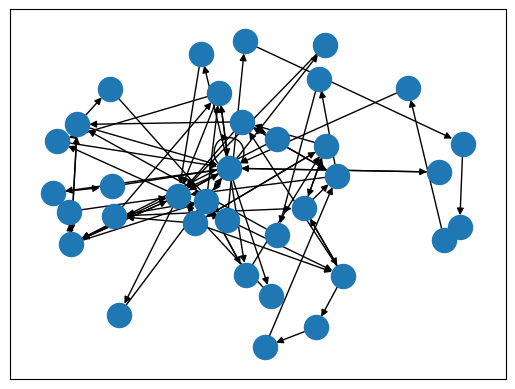

In [48]:
layouts = {'spring' : nx.spring_layout(G, k=1),
           'spiral': nx.spiral_layout(G),
           'spectral': nx.spectral_layout(G),
           'random': nx.random_layout(G),
           'circle': nx.circular_layout(G),
           }

# G_copy = nx.convert_node_labels_to_integers(G)

nx.draw_networkx(G, pos=layouts['spring'], with_labels = False)

In [30]:
# The eccentricity of a node v is the maximum distance from v to all other nodes in G.
ecc_dict = nx.eccentricity(G)

In [34]:
ecc_dict.values()

dict_values([10, 9, 9, 11, 10, 9, 10, 9, 10, 9, 8, 8, 7, 11, 10, 10, 10, 11, 10, 10, 9, 10, 11, 10, 9, 8, 13, 12, 11, 10, 9, 9, 9, 10, 10])

In [35]:
'''    
Graph properties from paper:
number of edges/ length - completed
diameter - longest path of graph
density for difected graph = edges / nodes * (nodes - 1)  
radius - shortest path of graph
recirocity
assortativity coefficient
average clustering coefficient
--------------------------------
additonal features:
neighbors
Hamming distance
Shannon entropy
'''
num_nodes = graph_200['Node'].nunique()
num_edges = graph_200[['Node', 'Edge']].value_counts().reset_index(name='count').shape[0] # unique {node, edge} pairing
diameter = nx.diameter(G)
radius = nx.radius(G)
reciprocity = nx.reciprocity(G)
dac = nx.degree_assortativity_coefficient(G)
avg_clustering = nx.average_clustering(G)
density = nx.density(G)
print('Number of Nodes: ', num_nodes)
print('Number of Edges/ Length: ', num_edges)
print('Radius of Graph: ', radius)
print('Diameter of Graph: ', diameter)
print('Reciprocity of Graph: ', reciprocity)
print('Assortativity coefficient of Graph: ', dac)
print('Average Clustering coefficient of Graph: ', avg_clustering)
print('Density of Graph: ', density)

Number of Nodes:  35
Number of Edges/ Length:  74
Radius of Graph:  7
Diameter of Graph:  13
Reciprocity of Graph:  0.2702702702702703
Assortativity coefficient of Graph:  -0.1383328783308315
Average Clustering coefficient of Graph:  0.24121461595297872
Density of Graph:  0.06218487394957983


In [ ]:
'''
ID | timestamp | payload (8 cols) | 

'''

In [36]:
nx.degree(G) # num edges adjacent to node

DiDegreeView({'18FEBF0B': 6, '08FE6E0B': 14, '0CF00400': 20, '0CF00300': 7, '18F00131': 4, '18FEF100': 6, '18FEF131': 5, '18F0000F': 6, '18FEF031': 6, '18FEF200': 6, '18FEF231': 7, '0CF00331': 8, '18FEE000': 6, '18EAFF31': 2, '18FEED00': 2, '18F0010B': 2, '18FECA31': 2, '18FEDF00': 4, '18FDA155': 2, '18FE5600': 2, '18FEEE00': 2, '18FEF600': 2, '0CFEDD00': 2, '18FEEF00': 2, '18FEF500': 2, '18FEC100': 2, '18FEBD00': 2, '18FEE400': 2, '18FEF700': 2, '18FD7C00': 2, '18FEFF00': 2, '18EA3100': 2, '1CECFF0F': 2, '1CEBFF0F': 3, '18FEE631': 2})